In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('cleaned_data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [4]:
df.drop(columns='Unnamed: 0',inplace=True)

In [7]:
df

,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,118,4,4.5,4.5,9.65,1,0.92
1,107,4,4.0,4.5,8.87,1,0.76
2,104,3,3.0,3.5,8.00,1,0.72
3,110,3,3.5,2.5,8.67,1,0.80
4,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...
495,108,5,4.5,4.0,9.02,1,0.87
496,117,5,5.0,5.0,9.87,1,0.96
497,120,5,4.5,5.0,9.56,1,0.93
498,103,4,4.0,5.0,8.43,0,0.73


In [5]:
X=df.drop(columns='Chance of Admit')
y=df['Chance of Admit']

# Modelling With MLR 

In [32]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

r2_list=[]
cv_list=[]

for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    
    rs_model= LinearRegression()
    
    rs_model.fit(X_train,y_train)
    
    rs_ypred_train=rs_model.predict(X_train)
    
    r2_list.append(r2_score(y_train,rs_ypred_train))
    
    cv_list.append(cross_val_score(rs_model,X,y,cv=5,scoring='r2').mean())

rs_df=pd.DataFrame({'R2':r2_list,'CV':cv_list})



rs_df

,R2,CV
0,0.825739,0.806271
1,0.817035,0.806271
2,0.822723,0.806271
3,0.822219,0.806271
4,0.827592,0.806271
...,...,...
95,0.811118,0.806271
96,0.834018,0.806271
97,0.812429,0.806271
98,0.817742,0.806271


In [27]:
# Any random state number will work

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
model= LinearRegression()
model.fit(X_train,y_train)

ypred_train=model.predict(X_train)

print('R2 train : ',r2_score(y_train,ypred_train))
print('Cross validation score : ',cross_val_score(model,X,y,cv=5,scoring='r2').mean())
    

R2 train :  0.8130289588329237
Cross validation score :  0.8062712883597538


In [46]:
ypred_test=model.predict(X_test)
print('R2 test : ',r2_score(y_test,ypred_test))

R2 test :  0.8285335139224476


In [49]:
print('Intercept : ',model.intercept_)
print('Coefficients : ',model.coef_)
model.coef_.min()

Intercept :  -1.0024177878994052
Coefficients :  [0.0047461  0.0036854  0.00116076 0.0161052  0.1313345  0.0338509 ]


0.0011607632429670844

In [48]:
# According to MLR CGPA is the most important factor
# SOP is significant but least defining 

df



,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,118,4,4.5,4.5,9.65,1,0.92
1,107,4,4.0,4.5,8.87,1,0.76
2,104,3,3.0,3.5,8.00,1,0.72
3,110,3,3.5,2.5,8.67,1,0.80
4,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...
495,108,5,4.5,4.0,9.02,1,0.87
496,117,5,5.0,5.0,9.87,1,0.96
497,120,5,4.5,5.0,9.56,1,0.93
498,103,4,4.0,5.0,8.43,0,0.73


## Checking assumptions

# Linearity of errors

In [54]:
df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)
df_train

,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
249,111,3,3.5,4.0,8.83,1,0.77
433,111,4,4.0,5.0,8.54,0,0.71
19,102,3,3.5,3.0,8.50,0,0.62
322,107,2,2.5,4.0,8.27,0,0.72
332,106,3,3.5,2.5,8.21,1,0.75
...,...,...,...,...,...,...,...
106,111,4,4.5,4.5,9.18,1,0.87
270,105,2,2.5,3.0,8.22,1,0.72
348,99,1,2.0,2.0,7.25,0,0.57
435,105,2,2.5,4.0,7.68,0,0.55


[]

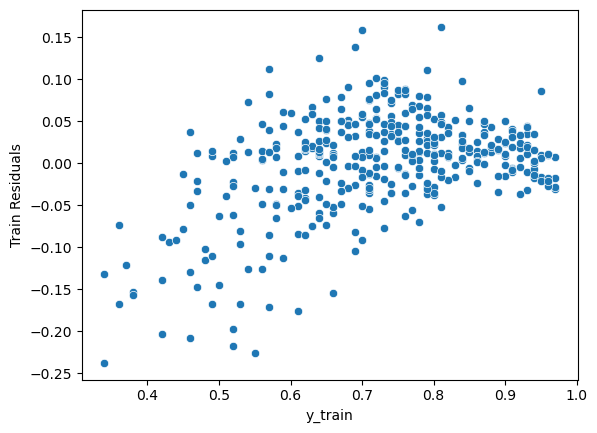

In [56]:
train_error=y_train-ypred_train

sns.scatterplot(x=y_train,y=train_error,data=df_train)
plt.xlabel('y_train')
plt.ylabel('Train Residuals')
plt.plot()

# Normality of errors

In [51]:
train_error.skew()

-1.0622474597969978

## Equal variance of Errors

[]

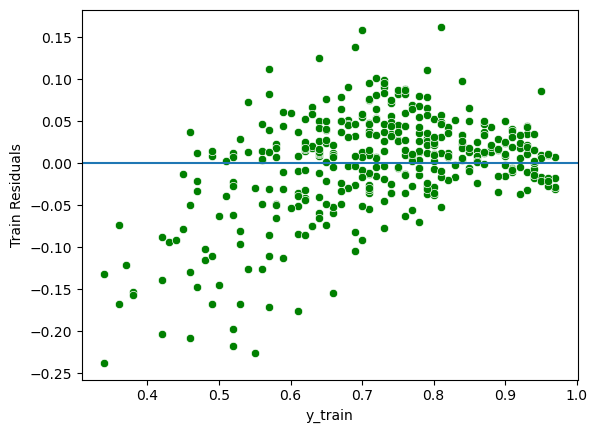

In [52]:


sns.scatterplot(x=y_train,y=train_error,data=df,c='g')
plt.axhline(y=0)
plt.xlabel('y_train')
plt.ylabel('Train Residuals')
plt.plot()

## Independence of Errors

In [57]:
from statsmodels.formula.api import ols

ols_model=ols('y_train~X_train',data=df_train).fit()

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     284.8
Date:                Sun, 14 Jul 2024   Prob (F-statistic):          1.04e-139
Time:                        15:11:24   Log-Likelihood:                 553.12
No. Observations:                 400   AIC:                            -1092.
Df Residuals:                     393   BIC:                            -1064.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0024      0.073    -13.647      0.000      -1.147      -0.858
X_train[0]     0.0047      0.001      5.491      0.000       0.003       0.006
X_train[1]     0.0037      0.004      0.861      0.390      -0.005       0.012
X_train[2]     0.0012      0.005      0.224      0.823      -0.009       0.011
X_train[3]     0.0161      0.005      3.448      0.001       0.007       0.025
X_train[4]     0.1313      0.010     13.129      0.000       0.112       0.151
X_train[5]     0.0339      0.007      4.698      0.000       0.020       0.048
==============================================================================
Omnibus:                       77.650   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.254
Skew:                          -1.058   Prob(JB):                     2.36e-33
Kurtosis:                       5.130   Cond. No.                     2.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
df

,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,118,4,4.5,4.5,9.65,1,0.92
1,107,4,4.0,4.5,8.87,1,0.76
2,104,3,3.0,3.5,8.00,1,0.72
3,110,3,3.5,2.5,8.67,1,0.80
4,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...
495,108,5,4.5,4.0,9.02,1,0.87
496,117,5,5.0,5.0,9.87,1,0.96
497,120,5,4.5,5.0,9.56,1,0.93
498,103,4,4.0,5.0,8.43,0,0.73


SOP has the highest p_value of **0.823**
- Drop SOP and rebuild the model

In [68]:
df.drop(columns='SOP',inplace=True)
df

,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit
0,118,4,4.5,9.65,1,0.92
1,107,4,4.5,8.87,1,0.76
2,104,3,3.5,8.00,1,0.72
3,110,3,2.5,8.67,1,0.80
4,103,2,3.0,8.21,0,0.65
...,...,...,...,...,...,...
495,108,5,4.0,9.02,1,0.87
496,117,5,5.0,9.87,1,0.96
497,120,5,5.0,9.56,1,0.93
498,103,4,5.0,8.43,0,0.73


In [69]:
df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)
df_train

,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit
249,111,3,4.0,8.83,1,0.77
433,111,4,5.0,8.54,0,0.71
19,102,3,3.0,8.50,0,0.62
322,107,2,4.0,8.27,0,0.72
332,106,3,2.5,8.21,1,0.75
...,...,...,...,...,...,...
106,111,4,4.5,9.18,1,0.87
270,105,2,3.0,8.22,1,0.72
348,99,1,2.0,7.25,0,0.57
435,105,2,4.0,7.68,0,0.55


In [59]:
X=df.drop(columns='SOP')

In [62]:
X.drop(columns='Chance of Admit',inplace=True)

In [63]:
X

,TOEFL Score,University Rating,LOR,CGPA,Research
0,118,4,4.5,9.65,1
1,107,4,4.5,8.87,1
2,104,3,3.5,8.00,1
3,110,3,2.5,8.67,1
4,103,2,3.0,8.21,0
...,...,...,...,...,...
495,108,5,4.0,9.02,1
496,117,5,5.0,9.87,1
497,120,5,5.0,9.56,1
498,103,4,5.0,8.43,0


In [64]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

# Building MLR Model by dropping SOP

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
model1= LinearRegression()
model1.fit(X_train,y_train)

ypred_train=model1.predict(X_train)

print('R2 train : ',r2_score(y_train,ypred_train))
print('Cross validation score : ',cross_val_score(model1,X,y,cv=5,scoring='r2').mean())

R2 train :  0.8130050861770723
Cross validation score :  0.8098141803788244


In [66]:
ypred_test=model1.predict(X_test)
print('R2 test : ',r2_score(y_test,ypred_test))

R2 test :  0.8285068849160336


## Check assumptions independence of errors

In [72]:
ols_model1=ols('y_train~X_train',data=df_train).fit()
ols_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     342.6
Date:                Sun, 14 Jul 2024   Prob (F-statistic):          5.48e-141
Time:                        15:23:52   Log-Likelihood:                 553.10
No. Observations:                 400   AIC:                            -1094.
Df Residuals:                     394   BIC:                            -1070.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0068      0.071    -14.231      0.000      -1.146      -0.868
X_train[0]     0.0048      0.001      5.558      0.000       0.003       0.006
X_train[1]     0.0040      0.004      0.996      0.320      -0.004       0.012
X_train[2]     0.0164      0.004      3.690      0.000       0.008       0.025
X_train[3]     0.1318      0.010     13.462      0.000       0.113       0.151
X_train[4]     0.0339      0.007      4.705      0.000       0.020       0.048
==============================================================================
Omnibus:                       77.203   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.788
Skew:                          -1.054   Prob(JB):                     4.91e-33
Kurtosis:                       5.117   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
# Remove University Rating as p_value >0.05 (0.320)

,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit
0,118,4,4.5,9.65,1,0.92
1,107,4,4.5,8.87,1,0.76
2,104,3,3.5,8.00,1,0.72
3,110,3,2.5,8.67,1,0.80
4,103,2,3.0,8.21,0,0.65
...,...,...,...,...,...,...
495,108,5,4.0,9.02,1,0.87
496,117,5,5.0,9.87,1,0.96
497,120,5,5.0,9.56,1,0.93
498,103,4,5.0,8.43,0,0.73


In [74]:
df.drop(columns='University Rating',inplace=True)

In [75]:
df

,TOEFL Score,LOR,CGPA,Research,Chance of Admit
0,118,4.5,9.65,1,0.92
1,107,4.5,8.87,1,0.76
2,104,3.5,8.00,1,0.72
3,110,2.5,8.67,1,0.80
4,103,3.0,8.21,0,0.65
...,...,...,...,...,...
495,108,4.0,9.02,1,0.87
496,117,5.0,9.87,1,0.96
497,120,5.0,9.56,1,0.93
498,103,5.0,8.43,0,0.73


In [76]:
X=df.drop(columns='Chance of Admit')
y=df['Chance of Admit']

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
model2= LinearRegression()
model2.fit(X_train,y_train)

ypred_train=model2.predict(X_train)

print('R2 train : ',r2_score(y_train,ypred_train))
print('Cross validation score : ',cross_val_score(model2,X,y,cv=5,scoring='r2').mean())

ypred_test=model2.predict(X_test)
print('R2 test : ',r2_score(y_test,ypred_test))

print('Intercept : ',model2.intercept_)
print('Coefficients : ',model2.coef_)
model2.coef_.min()

R2 train :  0.8125346497530792
Cross validation score :  0.8113165331382509
R2 test :  0.8246618450371275
Intercept :  -1.0380627497894293
Coefficients :  [0.00493027 0.01766959 0.13428911 0.03469451]


0.004930272640610038

In [78]:
ols_model2=ols('y_train~X_train',data=df_train).fit()
ols_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     428.0
Date:                Sun, 14 Jul 2024   Prob (F-statistic):          4.07e-142
Time:                        15:29:14   Log-Likelihood:                 552.59
No. Observations:                 400   AIC:                            -1095.
Df Residuals:                     395   BIC:                            -1075.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0381      0.063    -16.378      0.000      -1.163      -0.913
X_train[0]     0.0049      0.001      5.855      0.000       0.003       0.007
X_train[1]     0.0177      0.004      4.139      0.000       0.009       0.026
X_train[2]     0.1343      0.009     14.196      0.000       0.116       0.153
X_train[3]     0.0347      0.007      4.854      0.000       0.021       0.049
==============================================================================
Omnibus:                       75.892   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.869
Skew:                          -1.042   Prob(JB):                     3.48e-32
Kurtosis:                       5.085   Cond. No.                     2.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linearity of Errors (fails)

[]

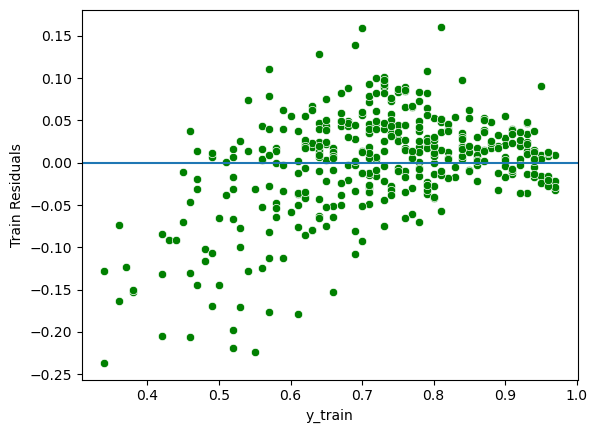

In [95]:
train_error=y_train-ypred_train

sns.scatterplot(x=y_train,y=train_error,data=df,c='g')
plt.axhline(y=0)
plt.xlabel('y_train')
plt.ylabel('Train Residuals')
plt.plot()

## Predict on Future Data

In [79]:
new_test={'GRE Score':307,'TOEFL Score':110, 'University Rating':4.5, 'SOP':3.5, 'LOR':4.0, 'CGPA':8.03,
       'Research':0}

new_df=pd.DataFrame(new_test,[0])

In [83]:
new_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,307,110,4.5,3.5,4.0,8.03,0


In [84]:
new_df.drop(['GRE Score','University Rating','SOP'],axis=1,inplace=True)

In [85]:
new_df

,TOEFL Score,LOR,CGPA,Research
0,110,4.0,8.03,0


In [94]:
model2.predict(new_df).tolist()[0]*100

65.32871828514706

# Lets see Polynomial Regression in other  notebook

#### MLR 82.46% accuracy but assumptions failed